<a href="https://colab.research.google.com/github/Ana-AlonsoCanizares/Quantum_computing4/blob/main/AnaAlonso_QC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
pip install yfinance --upgrade --no-cache-dir

In [38]:
pip install docplex

In [39]:
pip install CPLEX

Github: yfinance

In [40]:
!pip install pytickersymbols

In [41]:
pip install qiskit_optimization

In [42]:
pip install qiskit-optimization

In [43]:
# Import required libraries
import pandas as pd
import numpy as np
import datetime
from datetime import date
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import warnings
import seaborn as sns
import csv
import yfinance as yf

warnings.filterwarnings("ignore")
plt.style.use('seaborn')

Nos vamos a fjar en el valor de cerrado (Close) para analizar las gráficas.

[*********************100%%**********************]  27 of 27 completed


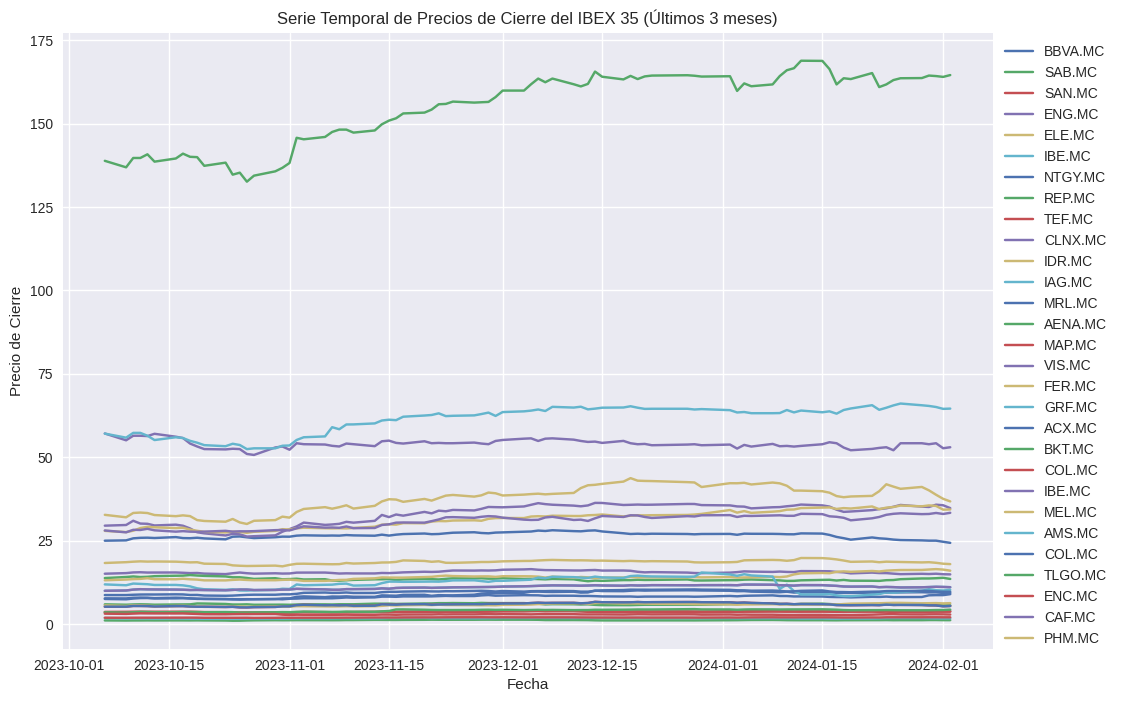

In [44]:
# Lista de símbolos de las acciones del IBEX35
ibex35_symbols = ['BBVA.MC', 'SAB.MC', 'SAN.MC', 'ENG.MC', 'ELE.MC', 'IBE.MC',
                  'NTGY.MC', 'REP.MC', 'TEF.MC', 'CLNX.MC', 'IDR.MC', 'IAG.MC',
                  'MRL.MC', 'AENA.MC', 'MAP.MC', 'VIS.MC', 'FER.MC', 'GRF.MC',
                  'ACX.MC', 'BKT.MC', 'COL.MC', 'IBE.MC', 'MEL.MC', 'AMS.MC',
                  'COL.MC', 'TLGO.MC', 'ENC.MC', 'CAF.MC', 'PHM.MC']

# Fecha de inicio y fin (últimos 3 meses)
end_date = datetime.today() - timedelta(days=30)
start_date = end_date - timedelta(days=120)

# Descargar datos desde Yahoo Finance
ibex35_data = yf.download(ibex35_symbols, start=start_date, end=end_date)['Adj Close']

# Graficar la serie temporal de los precios de cierre
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(ibex35_data.index, ibex35_data[symbol], label=symbol)

plt.title('Serie Temporal de Precios de Cierre del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

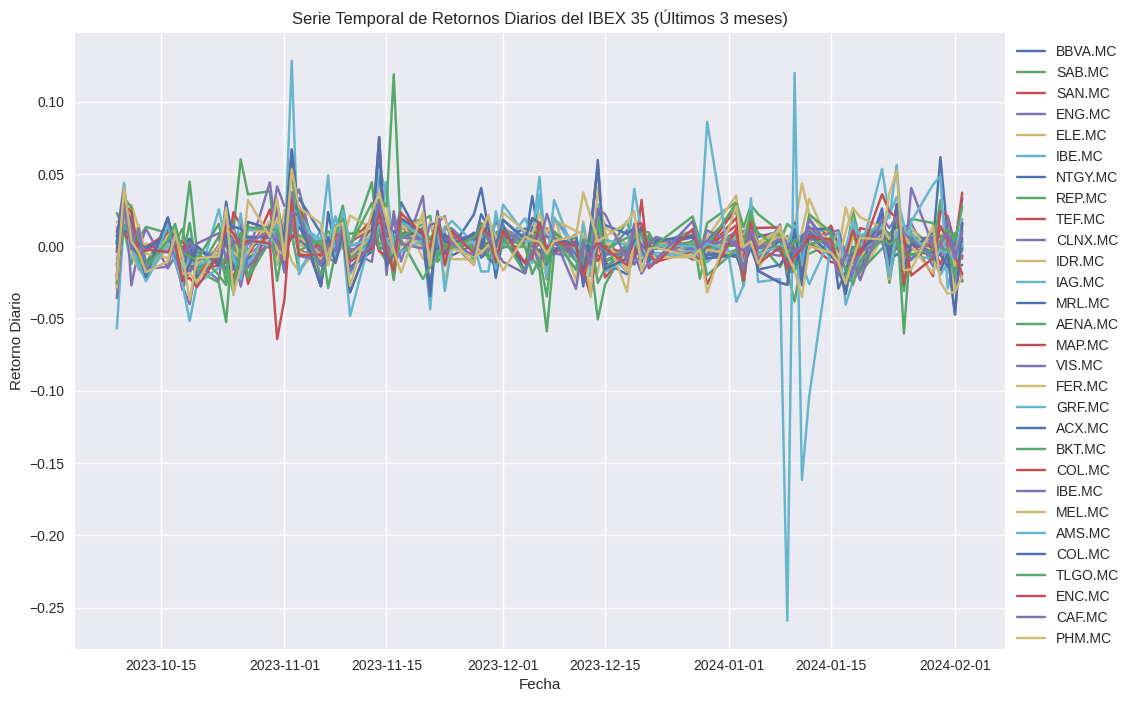

In [45]:
# Calcular los retornos diarios
returns = ibex35_data.pct_change()

# Graficar la serie temporal de los retornos
plt.figure(figsize=(12, 8))
for symbol in ibex35_symbols:
    plt.plot(returns.index, returns[symbol], label=symbol)

plt.title('Serie Temporal de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Fecha')
plt.ylabel('Retorno Diario')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

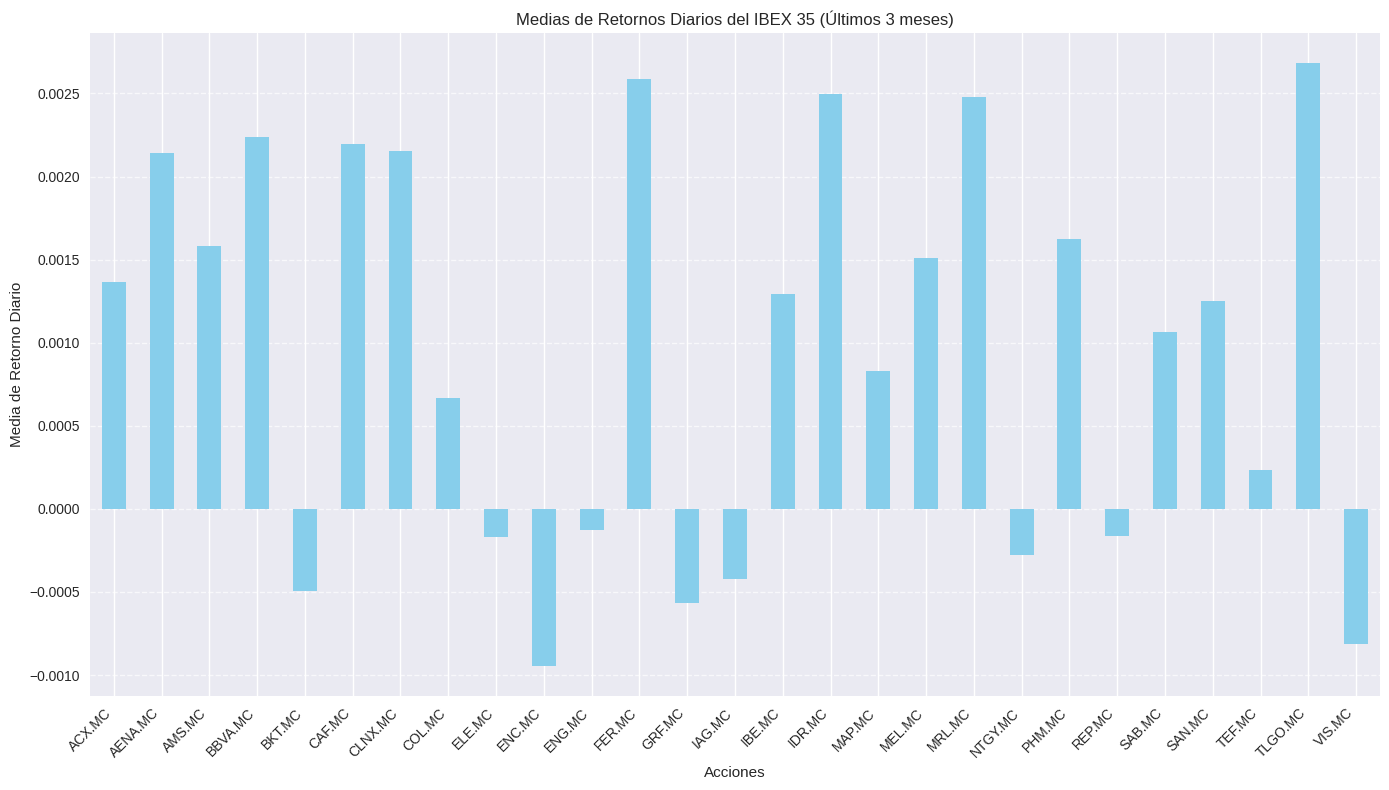

In [46]:
# Calcular la media de los retornos
mean_returns = returns.mean()

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Vamos tanto la media como la varianza en el mismo gráfico de barras.

<Figure size 1400x800 with 0 Axes>

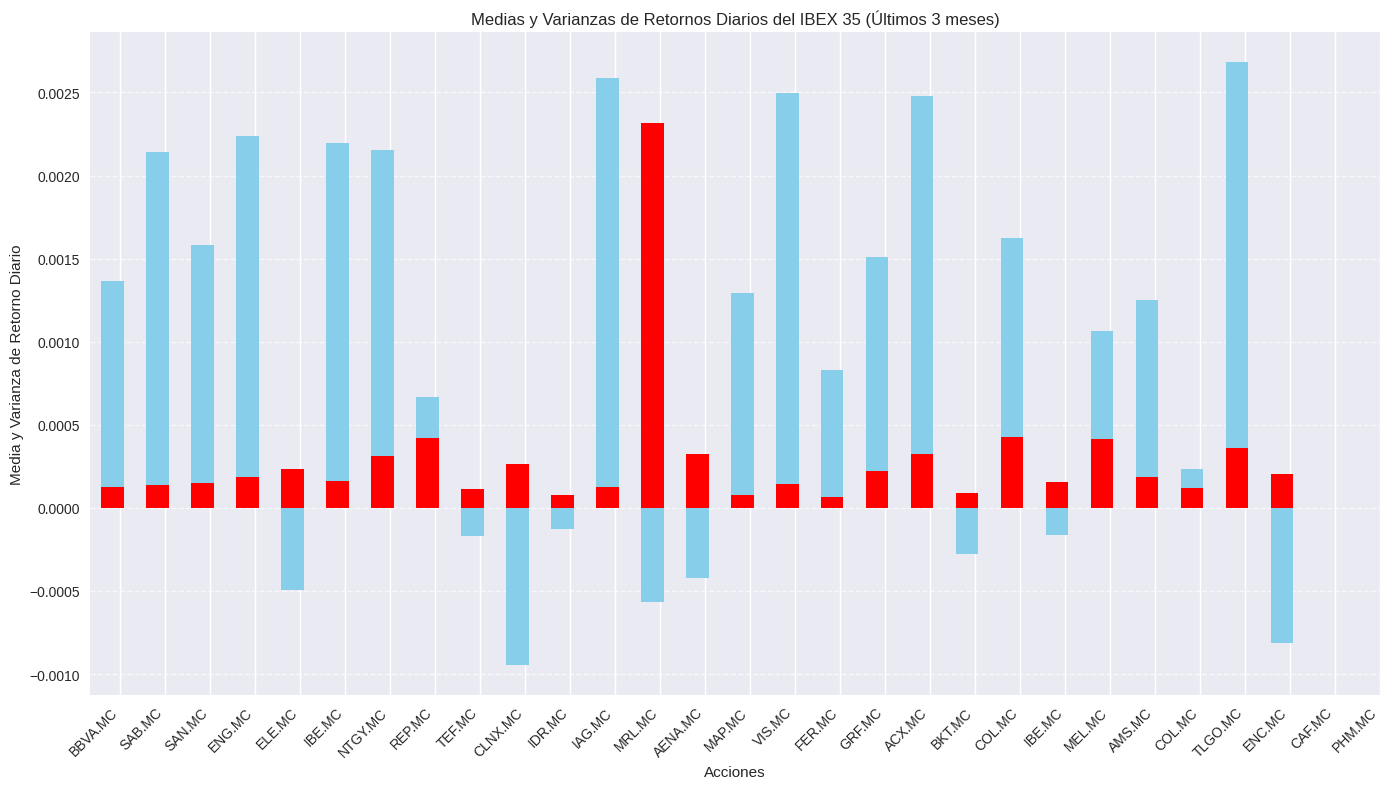

In [47]:
variance_returns = returns.var()

# Graficar el diagrama de barras de las medias y varianzas de los retornos
plt.figure(figsize=(14, 8))
bar_width = 0.35
index = np.arange(len(ibex35_symbols))

# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

variance_returns.plot(kind='bar', color='red')
plt.title('Medias y Varianzas de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(index + bar_width / 2, ibex35_symbols, rotation=45, ha='right')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nos interesan aquellas acciones con una media alta y con poda varianza.

A continuación, vemos la misma gráfica pero la varianza en línea.

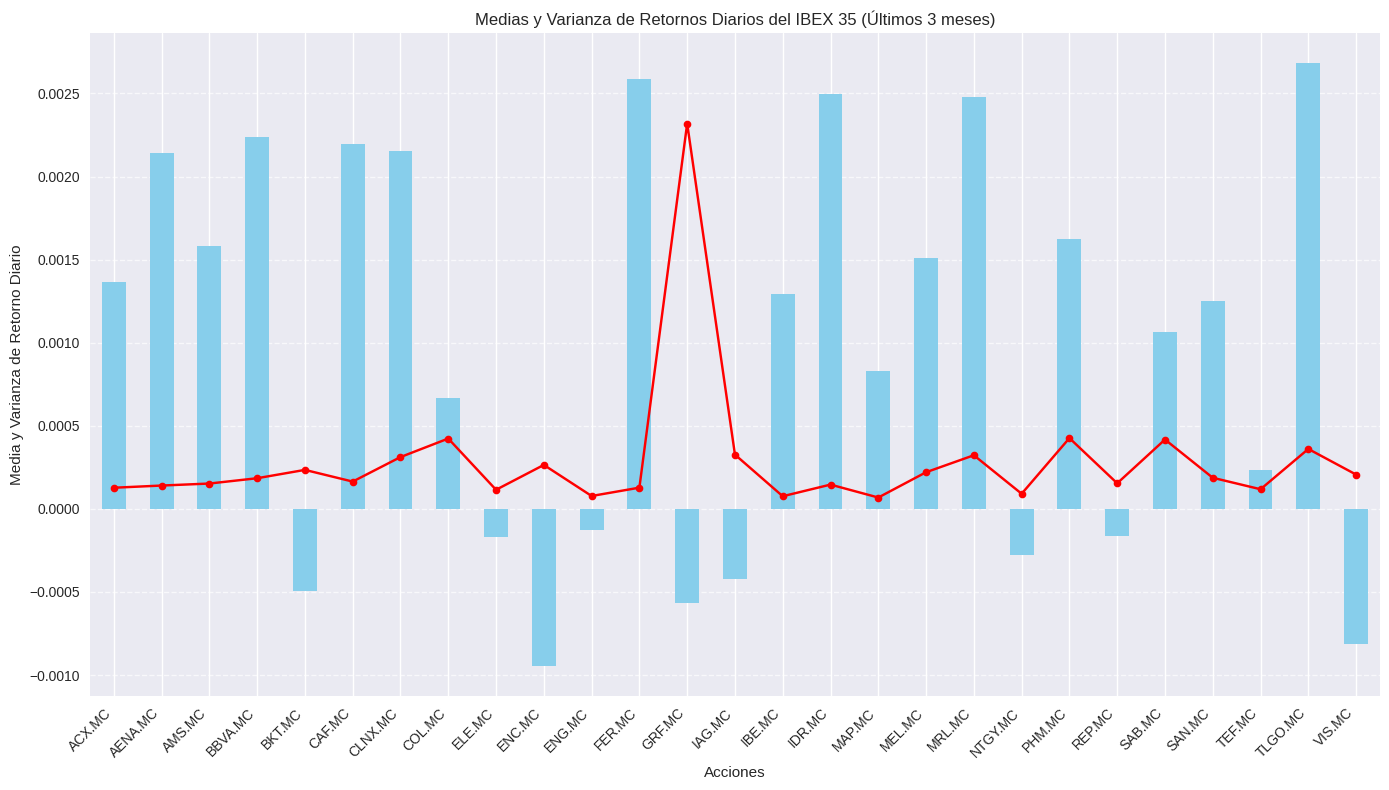

In [48]:
# Graficar el diagrama de barras de las medias de los retornos
plt.figure(figsize=(14, 8))
mean_returns.plot(kind='bar', color='skyblue')
plt.title('Medias y Varianza de Retornos Diarios del IBEX 35 (Últimos 3 meses)')
plt.xlabel('Acciones')
plt.ylabel('Media y Varianza de Retorno Diario')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.plot(variance_returns, color = 'red', marker = '.', markeredgewidth = 2)

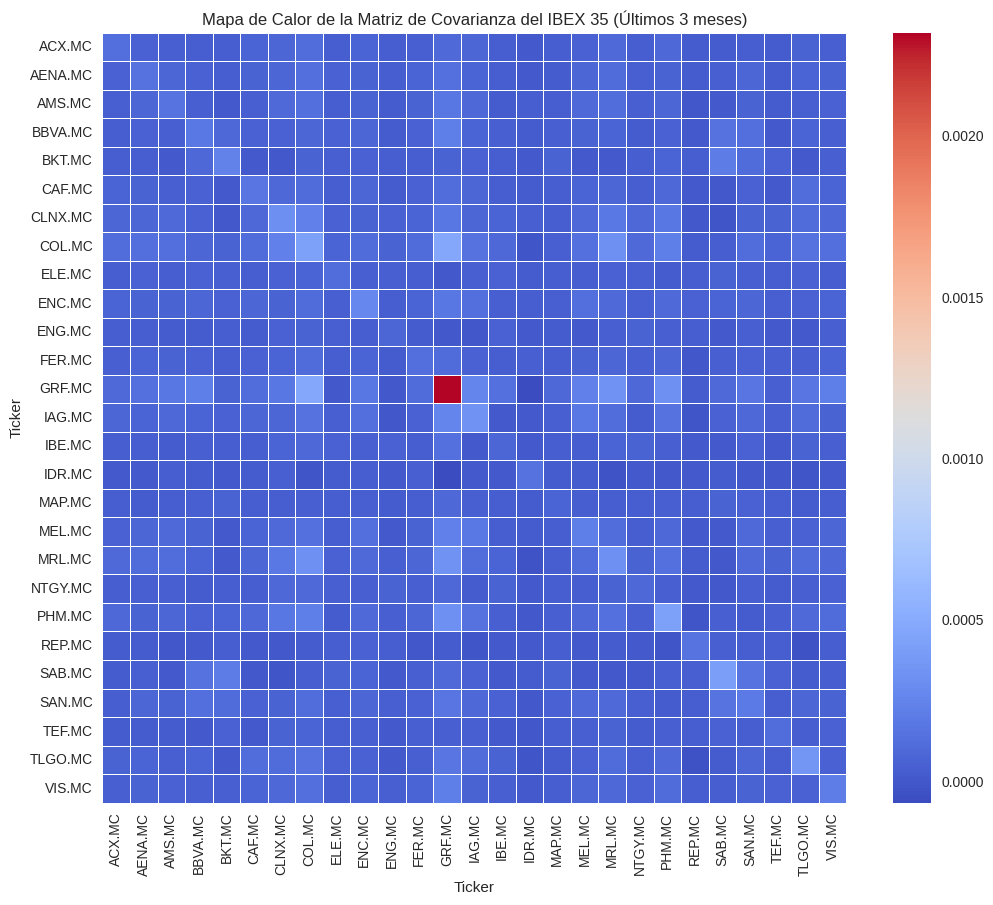

In [49]:
# Calcular la matriz de covarianza
covariance_matrix = returns.cov()

# Crear el mapa de calor
plt.figure(figsize=(12, 10))
sns.heatmap(covariance_matrix, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de Calor de la Matriz de Covarianza del IBEX 35 (Últimos 3 meses)')
plt.show()

In [ ]:
# Factor de inversión al riesgo: 0 < q < 1
q = 0.5

from itertools import combinations
vector = [0] * 27
combinations_list = list(combinations(range(27), 5))
results_dict = {}

for comb in combinations_list:
  new_vector = vector.copy()
  for index in comb:
    new_vector[index] = 1
    # print(new_vector)
  result_positions = []

  for index in comb:
    new_vector[index] = 1
  result_positions.append([i for i, x in enumerate(new_vector) if x == 1])
  # print(result_positions)

  primer_sumatorio = 0
  segundo_sumatorio = 0

  for i in range(27):
    primer_sumatorio = primer_sumatorio + new_vector[i]*mean_returns[i]
    for j in range(27):
      segundo_sumatorio = segundo_sumatorio + new_vector[i]*covariance_matrix.iloc[i,j]*new_vector[j]
  function = primer_sumatorio - q*segundo_sumatorio
  # Save results
  results_dict[comb] = (new_vector, function)

# # Print results dictionary
# for comb, (new_vector, function) in results_dict.items():
#     print(f"Combination: {comb}, New Vector: {new_vector}, Function Result: {function}")

KeyboardInterrupt: 

In [50]:
max_value = float('-inf')  # Inicializar con un valor muy pequeño
max_index = None
for comb, (new_vector, function) in results_dict.items():
    if function > max_value:
        max_value = function
        max_index = comb

print("Maximum Function Value:", max_value)
print("Index of Maximum Function Value:", max_index)

NameError: name 'results_dict' is not defined

In [ ]:
print('La mejor combinación de acciones para invertir es:')
for index in max_index:
  print(ibex35_symbols[index])

La mejor combinación de acciones para invertir es:
ENG.MC
ACX.MC
COL.MC
MEL.MC
AMS.MC


In [51]:
from docplex.mp.model import Model

In [52]:
# Prepare problem instances
n = 27
q = 0.5
budget = 5

In [53]:
# Create docplex model
mdl = Model("a")
x = mdl.binary_var_list(range(n), name = "x")
objective = mdl.sum([mean_returns[i]*x[i] for i in range(n)])
objective -= q*mdl.sum([covariance_matrix.iloc[i,j] * x[i] * x[j] for i in range(n) for j in range(n)])
mdl.maximize(objective)
mdl.add_constraint(mdl.sum(x[i] for i in range(n)) <= budget)

docplex.mp.LinearConstraint[](x_0+x_1+x_2+x_3+x_4+x_5+x_6+x_7+x_8+x_9+x_10+x_11+x_12+x_13+x_14+x_15+x_16+x_17+x_18+x_19+x_20+x_21+x_22+x_23+x_24+x_25+x_26,LE,5)

In [54]:
print(mdl.export_as_lp_string())

\ This file has been generated by DOcplex
\ ENCODING=ISO-8859-1
\Problem name: a

Maximize
 obj: 0.001364584018 x_0 + 0.002142118181 x_1 + 0.001580435902 x_2
      + 0.002238044823 x_3 - 0.000493786430 x_4 + 0.002193726232 x_5
      + 0.002154545131 x_6 + 0.000665499779 x_7 - 0.000169902462 x_8
      - 0.000946013525 x_9 - 0.000126423563 x_10 + 0.002589734200 x_11
      - 0.000564685897 x_12 - 0.000421556180 x_13 + 0.001293390037 x_14
      + 0.002494856113 x_15 + 0.000830452030 x_16 + 0.001509661459 x_17
      + 0.002477286873 x_18 - 0.000275909239 x_19 + 0.001622562956 x_20
      - 0.000161070299 x_21 + 0.001067087840 x_22 + 0.001249337080 x_23
      + 0.000232386827 x_24 + 0.002683480627 x_25 - 0.000812624929 x_26 + [
      - 0.000127113187 x_0^2 - 0.000095919231 x_0*x_1 - 0.000076326646 x_0*x_2
      - 0.000066715359 x_0*x_3 - 0.000062730496 x_0*x_4 - 0.000134931359 x_0*x_5
      - 0.000150427237 x_0*x_6 - 0.000234367653 x_0*x_7 - 0.000063855285 x_0*x_8
      - 0.000137310802 x_0*x

In [55]:
sol = mdl.solve()
mdl.print_solution()

objective: 0.011
status: OPTIMAL_SOLUTION(2)
  x_3=1
  x_11=1
  x_15=1
  x_18=1
  x_25=1


In [56]:
from qiskit_optimization import QuadraticProgram
from qiskit_optimization.translators.docplex_mp import from_docplex_mp

In [57]:
# load from a Docplex model
mod = from_docplex_mp(mdl)
print(type(mod))
print()
print(mod.prettyprint())

<class 'qiskit_optimization.problems.quadratic_program.QuadraticProgram'>

Problem name: a

Maximize
  -6.355659334484991e-05*x_0^2 - 4.7959615637579225e-05*x_0*x_1
  - 2.846240637804461e-05*x_0*x_10 - 3.624886861098843e-05*x_0*x_11
  - 9.72167308946631e-05*x_0*x_12 - 7.480818936193857e-05*x_0*x_13
  - 3.240344903596789e-05*x_0*x_14 - 1.1839707171020206e-05*x_0*x_15
  - 3.238102086624445e-05*x_0*x_16 - 5.147102059604478e-05*x_0*x_17
  - 9.336116494082187e-05*x_0*x_18 - 3.553920015343438e-05*x_0*x_19
  - 3.8163322946033455e-05*x_0*x_2 - 9.112934576422846e-05*x_0*x_20
  - 2.555534098576662e-05*x_0*x_21 - 2.3296626606416373e-05*x_0*x_22
  - 3.399677936214527e-05*x_0*x_23 - 2.0071570533064096e-05*x_0*x_24
  - 6.1841141402415e-05*x_0*x_25 - 3.747733129422571e-05*x_0*x_26
  - 3.335767929941518e-05*x_0*x_3 - 3.1365247880835346e-05*x_0*x_4
  - 6.746567929072659e-05*x_0*x_5 - 7.5213618387711e-05*x_0*x_6
  - 0.00011718382667356671*x_0*x_7 - 3.192764253142226e-05*x_0*x_8
  - 6.865540099203215e-05

In [58]:
from qiskit_optimization.converters import InequalityToEquality

In [59]:
ineq2eq = InequalityToEquality()
qp_eq = ineq2eq.convert(mod)
print(qp_eq.prettyprint())

Problem name: a

Maximize
  -6.355659334484991e-05*x_0^2 - 4.7959615637579225e-05*x_0*x_1
  - 2.846240637804461e-05*x_0*x_10 - 3.624886861098843e-05*x_0*x_11
  - 9.72167308946631e-05*x_0*x_12 - 7.480818936193857e-05*x_0*x_13
  - 3.240344903596789e-05*x_0*x_14 - 1.1839707171020206e-05*x_0*x_15
  - 3.238102086624445e-05*x_0*x_16 - 5.147102059604478e-05*x_0*x_17
  - 9.336116494082187e-05*x_0*x_18 - 3.553920015343438e-05*x_0*x_19
  - 3.8163322946033455e-05*x_0*x_2 - 9.112934576422846e-05*x_0*x_20
  - 2.555534098576662e-05*x_0*x_21 - 2.3296626606416373e-05*x_0*x_22
  - 3.399677936214527e-05*x_0*x_23 - 2.0071570533064096e-05*x_0*x_24
  - 6.1841141402415e-05*x_0*x_25 - 3.747733129422571e-05*x_0*x_26
  - 3.335767929941518e-05*x_0*x_3 - 3.1365247880835346e-05*x_0*x_4
  - 6.746567929072659e-05*x_0*x_5 - 7.5213618387711e-05*x_0*x_6
  - 0.00011718382667356671*x_0*x_7 - 3.192764253142226e-05*x_0*x_8
  - 6.865540099203215e-05*x_0*x_9 - 7.013395561718288e-05*x_1^2
  - 2.9778017929217235e-05*x_1*x_10 

In [60]:
from qiskit_optimization.converters import IntegerToBinary

In [61]:
int2bin = IntegerToBinary()
qp_eq_bin = int2bin.convert(qp_eq)
print(qp_eq_bin.prettyprint())

Problem name: a

Maximize
  -6.355659334484991e-05*x_0^2 - 4.7959615637579225e-05*x_0*x_1
  - 2.846240637804461e-05*x_0*x_10 - 3.624886861098843e-05*x_0*x_11
  - 9.72167308946631e-05*x_0*x_12 - 7.480818936193857e-05*x_0*x_13
  - 3.240344903596789e-05*x_0*x_14 - 1.1839707171020206e-05*x_0*x_15
  - 3.238102086624445e-05*x_0*x_16 - 5.147102059604478e-05*x_0*x_17
  - 9.336116494082187e-05*x_0*x_18 - 3.553920015343438e-05*x_0*x_19
  - 3.8163322946033455e-05*x_0*x_2 - 9.112934576422846e-05*x_0*x_20
  - 2.555534098576662e-05*x_0*x_21 - 2.3296626606416373e-05*x_0*x_22
  - 3.399677936214527e-05*x_0*x_23 - 2.0071570533064096e-05*x_0*x_24
  - 6.1841141402415e-05*x_0*x_25 - 3.747733129422571e-05*x_0*x_26
  - 3.335767929941518e-05*x_0*x_3 - 3.1365247880835346e-05*x_0*x_4
  - 6.746567929072659e-05*x_0*x_5 - 7.5213618387711e-05*x_0*x_6
  - 0.00011718382667356671*x_0*x_7 - 3.192764253142226e-05*x_0*x_8
  - 6.865540099203215e-05*x_0*x_9 - 7.013395561718288e-05*x_1^2
  - 2.9778017929217235e-05*x_1*x_10 

In [62]:
from qiskit_optimization.converters import LinearEqualityToPenalty

In [63]:
lineq2penalty = LinearEqualityToPenalty()
qubo = lineq2penalty.convert(qp_eq_bin)
print(qubo.prettyprint())

Problem name: a

Maximize
  -1.0594469791565169*c0@int_slack@0^2
  - 4.2377879166260675*c0@int_slack@0*c0@int_slack@1
  - 4.2377879166260675*c0@int_slack@0*c0@int_slack@2
  - 4.2377879166260675*c0@int_slack@1^2
  - 8.475575833252135*c0@int_slack@1*c0@int_slack@2
  - 4.2377879166260675*c0@int_slack@2^2 - 2.1188939583130337*x_0*c0@int_slack@0
  - 4.2377879166260675*x_0*c0@int_slack@1
  - 4.2377879166260675*x_0*c0@int_slack@2 - 1.0595105357498618*x_0^2
  - 2.1189419179286713*x_0*x_1 - 2.1189224207194117*x_0*x_10
  - 2.118930207181645*x_0*x_11 - 2.118991175043928*x_0*x_12
  - 2.1189687665023955*x_0*x_13 - 2.1189263617620697*x_0*x_14
  - 2.118905798020205*x_0*x_15 - 2.1189263393338997*x_0*x_16
  - 2.11894542933363*x_0*x_17 - 2.1189873194779745*x_0*x_18
  - 2.118929497513187*x_0*x_19 - 2.1189321216359795*x_0*x_2
  - 2.118985087658798*x_0*x_20 - 2.1189195136540198*x_0*x_21
  - 2.1189172549396402*x_0*x_22 - 2.1189279550923956*x_0*x_23
  - 2.118914029883567*x_0*x_24 - 2.118955799454436*x_0*x_25

https://qiskit-community.github.io/qiskit-optimization/tutorials/03_minimum_eigen_optimizer.html

In [66]:
from qiskit_optimization.translators import to_ising

In [70]:
# convert to Ising Hamiltonian
H, offset = qubo.to_ising()

# The offset number multiplies everything (factor común)
print("offset: {}".format(offset))
print("operator:")
print(H)

offset: 137.7220316569803
operator:
SparsePauliOp(['IIIIIIIIIIIIIIIIIIIIIIIIIIIIIZ', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIIZI', 'IIIIIIIIIIIIIIIIIIIIIIIIIIIZII', 'IIIIIIIIIIIIIIIIIIIIIIIIIIZIII', 'IIIIIIIIIIIIIIIIIIIIIIIIIZIIII', 'IIIIIIIIIIIIIIIIIIIIIIIIZIIIII', 'IIIIIIIIIIIIIIIIIIIIIIIZIIIIII', 'IIIIIIIIIIIIIIIIIIIIIIZIIIIIII', 'IIIIIIIIIIIIIIIIIIIIIZIIIIIIII', 'IIIIIIIIIIIIIIIIIIIIZIIIIIIIII', 'IIIIIIIIIIIIIIIIIIIZIIIIIIIIII', 'IIIIIIIIIIIIIIIIIIZIIIIIIIIIII', 'IIIIIIIIIIIIIIIIIZIIIIIIIIIIII', 'IIIIIIIIIIIIIIIIZIIIIIIIIIIIII', 'IIIIIIIIIIIIIIIZIIIIIIIIIIIIII', 'IIIIIIIIIIIIIIZIIIIIIIIIIIIIII', 'IIIIIIIIIIIIIZIIIIIIIIIIIIIIII', 'IIIIIIIIIIIIZIIIIIIIIIIIIIIIII', 'IIIIIIIIIIIZIIIIIIIIIIIIIIIIII', 'IIIIIIIIIIZIIIIIIIIIIIIIIIIIII', 'IIIIIIIIIZIIIIIIIIIIIIIIIIIIII', 'IIIIIIIIZIIIIIIIIIIIIIIIIIIIII', 'IIIIIIIZIIIIIIIIIIIIIIIIIIIIII', 'IIIIIIZIIIIIIIIIIIIIIIIIIIIIII', 'IIIIIZIIIIIIIIIIIIIIIIIIIIIIII', 'IIIIZIIIIIIIIIIIIIIIIIIIIIIIII', 'IIIZIIIIIIIIIIIIIIIIIIIIIIIIII', 'IIZIIIIIIIIIIIIIIIIIIIIIIIIIII